In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0 to 255 -> 0 to 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Split dataset
# Already split: x_train (50,000), x_test (10,000)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation: random flips, rotations, etc.
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Neural network model
model = Sequential()

# Input Layer (32x32x3 -> flattened to 3072)
model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden Layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

# Output Layer (10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ReLU chosen for hidden layers: avoids vanishing gradient, faster convergence.
# Softmax used for output: returns probability distribution for classes.


In [4]:
# Categorical Crossentropy (for classification)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mean Squared Error (comparison)
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Optional with data augmentation
# history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.2802 - loss: 2.0498 - val_accuracy: 0.3704 - val_loss: 1.7491
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.3964 - loss: 1.6862 - val_accuracy: 0.4228 - val_loss: 1.5954
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4333 - loss: 1.5918 - val_accuracy: 0.4346 - val_loss: 1.5812
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.4548 - loss: 1.5272 - val_accuracy: 0.4548 - val_loss: 1.5393
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4673 - loss: 1.4921 - val_accuracy: 0.4733 - val_loss: 1.4877
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.4802 - loss: 1.4464 - val_accuracy: 0.4697 - val_loss: 1.4708
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.4945 - loss: 1.4166 - val_accuracy: 0.4820 - val_loss: 1.4448
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5036 - loss: 1.3951 - 

In [6]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
print(confusion_matrix(y_true, y_pred))

# Precision, Recall, F1-Score
print(classification_report(y_true, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5044 - loss: 1.7235
Test Accuracy: 49.84%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[[572  38  43  32  32  20  46  13 148  56]
 [ 31 546  14  38  13  17  31  20  70 220]
 [ 82  14 335 102 161  68 147  43  23  25]
 [ 40  21  67 360  62 175 171  29  25  50]
 [ 49   6 103  92 451  36 170  48  28  17]
 [ 20   8  70 256  78 334 129  45  28  32]
 [ 11  13  51  85  93  33 672  11   9  22]
 [ 40  12  59  98 113  79  59 459  24  57]
 [109  56  18  36  28  14  24  11 652  52]
 [ 27 118  19  39  12  28  30  28  96 603]]
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1000
           1       0.66      0.55      0.60      1000
           2       0.43      0.34      0.38      1000
           3       0.32      0.36      0.34      1000
           4       0.43      0.45      0.44      1000
           5       0.42      0.33      0.37      1000
           6       0.45      0.67      0.54      10

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Retrain with optimization strategies
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),
          callbacks=[early_stopping, lr_scheduler])


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6634 - loss: 0.9371 - val_accuracy: 0.5018 - val_loss: 1.6672 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.6719 - loss: 0.9154 - val_accuracy: 0.5082 - val_loss: 1.6474 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.6761 - loss: 0.9122 - val_accuracy: 0.4885 - val_loss: 1.7125 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.6705 - loss: 0.9111 - val_accuracy: 0.4917 - val_loss: 1.7305 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6782 - loss: 0.9052 - val_accuracy: 0.4983 - val_loss: 1.7264 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7060 - loss: 0.8220 - val_accuracy: 0.5134 - val_loss: 1.6655 - learning_rate: 5.0000e-04
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.7159

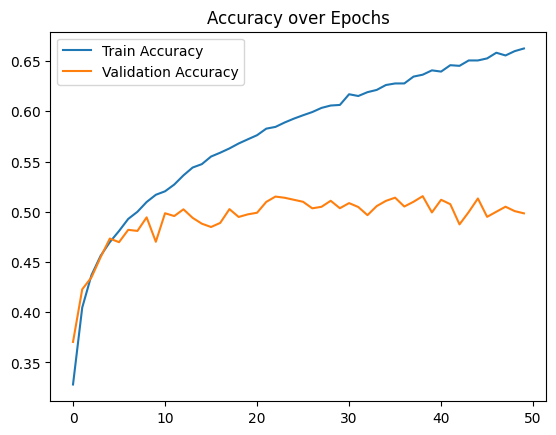

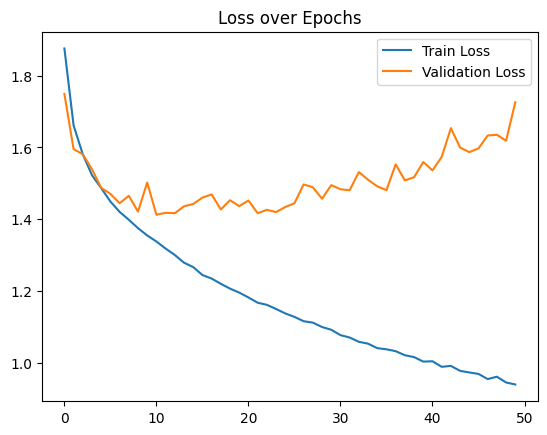

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()
